In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
dtypes= {
"STATION                  " :    "object",
"DATE                     " :    "object",
"HourlyAltimeterSetting   " :    "object",
"HourlyDewPointTemperature" :    "object",
"HourlyDryBulbTemperature " :    "object",
"HourlyPrecipitation      " :    "object",
"HourlyRelativeHumidity   " :    "object",
"HourlySkyConditions      " :    "object",
"HourlyStationPressure    " :    "object",
"HourlyVisibility         " :    "object",
"HourlyWetBulbTemperature " :    "object",
"HourlyWindDirection      " :    "object",
"HourlyWindSpeed          " :    "object",
"name                     " :    "object",
"latitude_deg             " :    "float64",
"longitude_deg            " :    "float64",
"iata_code                " :    "object"
}

In [9]:
import pandas as pd 
wd = pd.read_csv('/content/gdrive/MyDrive/flight-delays-data/weather-data-req.csv' , dtype = dtypes)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,5,7,9,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# Cleaning Weather Data

# Removing the index Column
wd = wd.loc[:, ~wd.columns.isin(["Unnamed: 0"])]

#Changing Date from object to date object and adding a new column Hour
wd["DATE"] = pd.to_datetime(wd['DATE'])
wd["Hour"] = wd["DATE"].apply(lambda x: x.hour)
wd["DATE"] = pd.to_datetime(wd['DATE']).dt.date
wd["DATE"] = pd.to_datetime(wd['DATE'])

In [40]:
# Removing unnecessary characters and filling null values with average
import numpy as np
def convert_dtype(col , strp):
  wd[col] = wd[col].astype('str')
  wd[col] = wd[col].apply(lambda x : x.strip(strp))
  wd[col] = wd[col].apply(lambda x : np.nan if x == '' else x )
  wd[col] = wd[col].astype('float')
  wd[col] = wd[col].fillna(wd[col].mean())


In [41]:
# Preprocessing the weather data

x = ["HourlyDewPointTemperature" , "HourlyDryBulbTemperature" , "HourlyRelativeHumidity" , "HourlyWindSpeed" ]
for col in x:
  convert_dtype(col , "s*")

x = ["HourlyVisibility" , "HourlyStationPressure" , "HourlyRelativeHumidity"]
for col in x:
  convert_dtype(col , "s*V")


In [42]:
# Preprocessing the Weather Data

wd["HourlyPrecipitation"] = wd["HourlyPrecipitation"].astype('str')
wd["HourlyPrecipitation"] = wd["HourlyPrecipitation"].apply(lambda x : x.strip("sT*"))
wd["HourlyPrecipitation"] = wd["HourlyPrecipitation"].apply(lambda x : x if x.replace('.', '', 1).isdigit() else 0 )
wd["HourlyPrecipitation"] = wd["HourlyPrecipitation"].astype('float')
wd["HourlyPrecipitation"] = wd["HourlyPrecipitation"].fillna(wd["HourlyPrecipitation"].mean())


In [ ]:
wd.to_csv("/content/gdrive/MyDrive/flight-delays-data/Weather-Final.csv" , index = False)

In [4]:
import datetime
import pandas as pd
df = pd.read_csv("/content/gdrive/MyDrive/flight-delays-data/Final.csv" )
df["CRS_DEP_TIME"] =  df.CRS_DEP_TIME.astype(str)
df["CRS_DEP_TIME"] = df["CRS_DEP_TIME"].apply( lambda t : "0"*(3-len(t))+t if len(t) < 3 else t )
df["Departure_Hour"] = df["CRS_DEP_TIME"].apply( lambda t : datetime.datetime.strptime(t,'%H%M').strftime('%H'))
df["Departure_Hour"] = df["Departure_Hour"].astype('int')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,10,47,65,69,71) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 61,Unnamed: 60,BRANDED_CODE_SHARE,SCH_OP_CARRIER_FL_NUM,ORIGIN_STATE_FIPS,DEST_STATE_FIPS,DUP,Unnamed: 63,MKT_CARRIER,Unnamed: 64,Departure_Hour
0,0,0,2021,1,23,6,2021-01-23,WN,19393,4089,WN,19393.0,N7745A,4089,11259,1125904,30194,DAL,"Dallas, TX",TX,Texas,14683,1468305,33214,SAT,"San Antonio, TX",TX,Texas,935,928.0,-7.0,0.0,0.0,-1.0,0900-0959,8.0,936.0,1023.0,3.0,1045,1026.0,-19.0,0.0,0.0,-2.0,1000-1059,0.0,0,0.0,70.0,58.0,47.0,1.0,247.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,9
1,1,1,2021,1,23,6,2021-01-23,WN,19393,3358,WN,19393.0,N8609A,3358,11259,1125904,30194,DAL,"Dallas, TX",TX,Texas,14831,1483106,32457,SJC,"San Jose, CA",CA,California,1440,1439.0,-1.0,0.0,0.0,-1.0,1400-1459,10.0,1449.0,1616.0,4.0,1630,1620.0,-10.0,0.0,0.0,-1.0,1600-1659,0.0,0,0.0,230.0,221.0,207.0,1.0,1450.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,14
2,2,2,2021,1,23,6,2021-01-23,WN,19393,1625,WN,19393.0,N290WN,1625,11259,1125904,30194,DAL,"Dallas, TX",TX,Texas,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,Utah,1050,1044.0,-6.0,0.0,0.0,-1.0,1000-1059,8.0,1052.0,1224.0,4.0,1245,1228.0,-17.0,0.0,0.0,-2.0,1200-1259,0.0,0,0.0,175.0,164.0,152.0,1.0,999.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,10
3,3,3,2021,1,23,6,2021-01-23,WN,19393,4091,WN,19393.0,N7745A,4091,11259,1125904,30194,DAL,"Dallas, TX",TX,Texas,14893,1489302,33192,SMF,"Sacramento, CA",CA,California,1405,1404.0,-1.0,0.0,0.0,-1.0,1400-1459,8.0,1412.0,1536.0,3.0,1555,1539.0,-16.0,0.0,0.0,-2.0,1500-1559,0.0,0,0.0,230.0,215.0,204.0,1.0,1442.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,14
4,4,4,2021,1,23,6,2021-01-23,WN,19393,1095,WN,19393.0,N7864B,1095,11259,1125904,30194,DAL,"Dallas, TX",TX,Texas,15016,1501606,31123,STL,"St. Louis, MO",MO,Missouri,1415,1416.0,1.0,1.0,0.0,0.0,1400-1459,10.0,1426.0,1537.0,3.0,1555,1540.0,-15.0,0.0,0.0,-1.0,1500-1559,0.0,0,0.0,100.0,84.0,71.0,1.0,546.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,14


In [8]:
import pandas as pd 
wd = pd.read_csv('/content/gdrive/MyDrive/flight-delays-data/Weather-Final.csv' , dtype = dtypes)

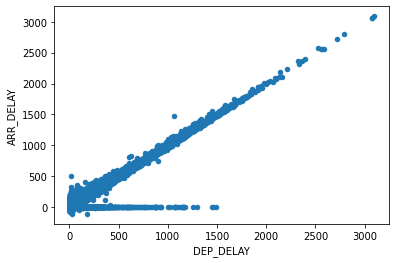

In [10]:
df[(df["DEP_DELAY"] > 0)].plot.scatter( "DEP_DELAY" , "ARR_DELAY" )

Text(0, 0.5, 'Delay in minutes')

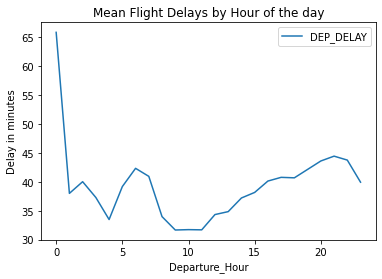

In [13]:
import matplotlib.pyplot as plt
tmp = df[(df["DEP_DELAY"] > 0)][["DEP_DELAY" , "Departure_Hour"]].groupby("Departure_Hour").mean().reset_index()
tmp.plot.line("Departure_Hour" , "DEP_DELAY")
plt.title("Mean Flight Delays by Hour of the day")
plt.ylabel("Delay in minutes")

In [66]:
df = pd.read_csv('/content/gdrive/MyDrive/flight-delays-data/Final.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,10,47,65,69,71) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0.5, 1.0, 'MONTH VS Number of flights delayed of each delay type')

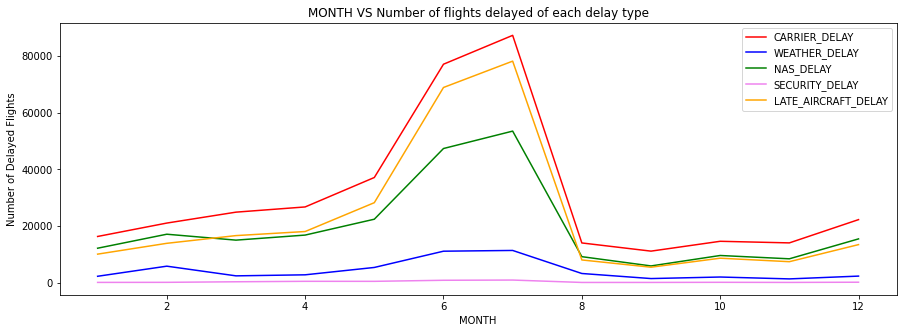

In [68]:
res = df
tmp = res[(res["DEP_DELAY"] > 0)][["MONTH", "CARRIER_DELAY" , "WEATHER_DELAY" , "NAS_DELAY" , "SECURITY_DELAY" , "LATE_AIRCRAFT_DELAY"]].groupby("MONTH").agg(lambda x: x.ne(0).sum()).reset_index()

import matplotlib.pyplot as plt

c_arr = ["red" , "blue" , "green" , "violet" , "orange"]

plt.figure(figsize=(15,5))
plt.plot(tmp["MONTH"], tmp["CARRIER_DELAY"] , color = c_arr[0])
plt.plot(tmp["MONTH"], tmp["WEATHER_DELAY"] , color = c_arr[1])
plt.plot(tmp["MONTH"], tmp["NAS_DELAY"] , color = c_arr[2])
plt.plot(tmp["MONTH"], tmp["SECURITY_DELAY"] , color = c_arr[3])
plt.plot(tmp["MONTH"], tmp["LATE_AIRCRAFT_DELAY"] , color = c_arr[4])
plt.legend(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'])
plt.xlabel("MONTH")
#plt.set_xlim(1,12)
plt.ylabel("Number of Delayed Flights")
plt.title("MONTH VS Number of flights delayed of each delay type")


In [98]:
import pandas as pd 
df = pd.read_csv('/content/gdrive/MyDrive/flight-delays-data/Cities/ATL.csv' , dtype = dtypes)
res = pd.merge(df, wd ,  how='left', left_on=['FL_DATE','ORIGIN' , 'Departure_Hour'], right_on = ['DATE','iata_code' , 'Hour'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,10,47,65,69,71) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0, 0.5, 'Delay in minutes')

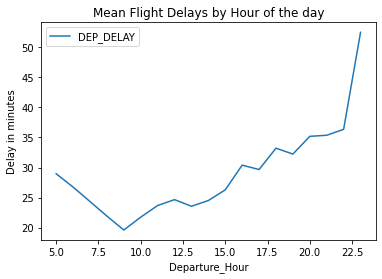

In [175]:
tmp = df[(df["DEP_DELAY"] > 0)][["DEP_DELAY" , "Departure_Hour"]].groupby("Departure_Hour").mean().reset_index()
tmp.plot.line("Departure_Hour" , "DEP_DELAY")
plt.title("Mean Flight Delays by Hour of the day")
plt.ylabel("Delay in minutes")

In [208]:
def split_by_WindSpeed(row):
  global groups
  mn = int(row["HourlyWindSpeed"] / 5)
  mx  = (mn+1) * 5
  return str(mn * 5) + " , " + str(mx)

res.sort_values(by=['HourlyWindSpeed'])
res["Speed_Cat"] = res.apply(lambda row: split_by_WindSpeed(row) , axis = 1 )


Text(0.5, 0, 'Speed')

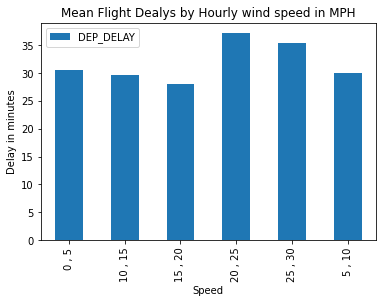

In [209]:
tmp = res[(res["DEP_DELAY"] > 0)][["DEP_DELAY" , "Speed_Cat"]].groupby("Speed_Cat").mean().reset_index()
tmp.plot.bar("Speed_Cat" , "DEP_DELAY")
plt.title("Mean Flight Dealys by Hourly wind speed in MPH")
plt.ylabel("Delay in minutes")
plt.xlabel("Speed")

In [165]:
def split_by_Visibility(row):
  mn = int(row["HourlyVisibility"])
  #mx  = (mn+1) * 5
  return mn#str(mn) + " , " + str(mn+1)

res = res.sort_values(by=['HourlyVisibility'])
res["Visibility_cat"] = res.apply(lambda row: split_by_Visibility(row) , axis = 1 )
#res = res.sort_values(by=['Visibility_cat'])


Text(0.5, 0, 'Visibility')

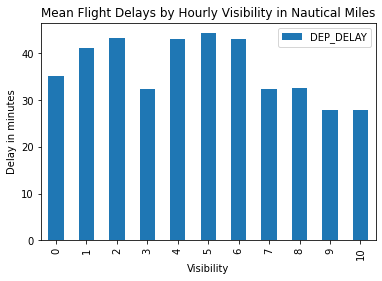

In [178]:
tmp = res[(res["DEP_DELAY"] > 0) ][["DEP_DELAY" , "Visibility_cat"]].groupby("Visibility_cat").mean().reset_index()
tmp.plot.bar("Visibility_cat" , "DEP_DELAY")
plt.title("Mean Flight Delays by Hourly Visibility in Nautical Miles")
plt.ylabel("Delay in minutes")
plt.xlabel("Visibility")

Text(0.5, 0, 'Precipitation')

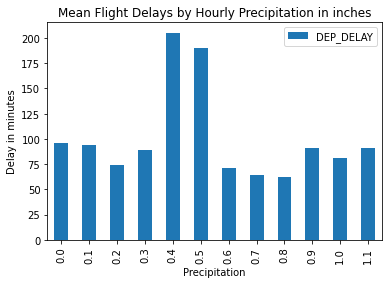

In [177]:
def split_by_Precipitation(row):
  mn = (int(row["HourlyPrecipitation"] * 10 ) - 1) / 10
  if mn < 0:
    mn = 0
  #mx  = (mn+1) * 5
  return mn#str(mn) + " , " + str(mn+1)

res = res.sort_values(by=['HourlyPrecipitation'])
res["HourlyPrecipitation_Cat"] = res.apply(lambda row: split_by_Precipitation(row) , axis = 1 )
#res = res.sort_values(by=['Visibility_cat'])

tmp = res[(res["DEP_DELAY"] > 0) &  ( res["WEATHER_DELAY"] > 0 ) ][["DEP_DELAY" , "HourlyPrecipitation_Cat"]].groupby("HourlyPrecipitation_Cat").mean().reset_index()
tmp.plot.bar("HourlyPrecipitation_Cat" , "DEP_DELAY")
plt.title("Mean Flight Delays by Hourly Precipitation in inches")
plt.ylabel("Delay in minutes")
plt.xlabel("Precipitation")